A CNN Model for MNIST dataset classification

In [ ]:
from tensorflow.keras.datasets.mnist import load_data

load mnist dataset

In [ ]:
(trainX,trainY),(testX,testY)=load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print('Train x,y:',(trainX.shape,trainY.shape))
print('Train x,y:',(testX.shape,testY.shape))


Train x,y: ((60000, 28, 28), (60000,))
Train x,y: ((10000, 28, 28), (10000,))


plot first few images
The images are colored

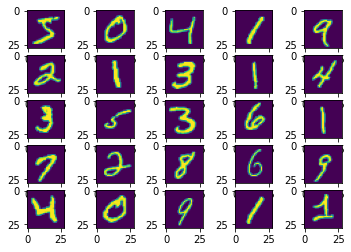

In [ ]:
import matplotlib.pyplot as plt
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(trainX[i])
plt.show()

The images are gray

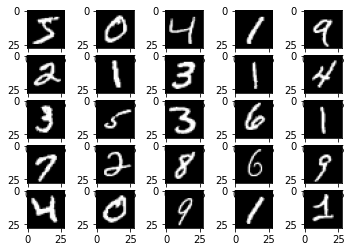

In [ ]:
import matplotlib.pyplot as plt
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(trainX[i], cmap='gray')
plt.show()

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout




Reshape data to have a single Channel

 قراره فقط عمق ما یک باشد یعنی قبلا 28 *28 * 60000 بود حالا
60000 * 28 * 28 *1

In [ ]:
trainX =trainX.reshape(trainX.shape[0],trainX.shape[1],trainX.shape[2],1)
testX =testX.reshape(testX.shape[0],testX.shape[1],testX.shape[2],1)
print( 'Train' ,trainX.shape)
print( 'Test' , testX.shape)

Train (60000, 28, 28, 1)
Test (10000, 28, 28, 1)


Normalize pixcel value


In [ ]:
from numpy import asarray
trainX = trainX.astype('float32')/255.0
testX = testX.astype('float32')/255.0


**Step1:** Define the model


In [ ]:
in_shape =trainX.shape[1:]
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform' , input_shape=in_shape ))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(100, activation='relu' , kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

**Step2:** Compile the model




In [ ]:
model.compile(optimizer ='adam', loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

**Step3:** Fit the model (training phase)

In [ ]:
model.fit(x=trainX, y=trainY,epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 30s 63ms/step - loss: 0.3581 - accuracy: 0.8916
Epoch 2/10
469/469 [==============================] - 28s 59ms/step - loss: 0.1486 - accuracy: 0.9566
Epoch 3/10
469/469 [==============================] - 28s 60ms/step - loss: 0.1088 - accuracy: 0.9685
Epoch 4/10
469/469 [==============================] - 32s 69ms/step - loss: 0.0903 - accuracy: 0.9729
Epoch 5/10
469/469 [==============================] - 31s 65ms/step - loss: 0.0758 - accuracy: 0.9770
Epoch 6/10
469/469 [==============================] - 28s 59ms/step - loss: 0.0686 - accuracy: 0.9788
Epoch 7/10
469/469 [==============================] - 28s 59ms/step - loss: 0.0598 - accuracy: 0.9812
Epoch 8/10
469/469 [==============================] - 35s 75ms/step - loss: 0.0568 - accuracy: 0.9821
Epoch 9/10
469/469 [==============================] - 35s 74ms/step - loss: 0.0524 - accuracy: 0.9830
Epoch 10/10
469/469 [==============================] - 33s 71ms/step - loss: 0.048

**Step4:** Evaluate the model (Testing Phase)

In [ ]:

loss ,accuracy =model.evaluate(testX, testY , verbose=0)
print('Accuracy: ' , accuracy*100 )
print('Loss: ' ,loss )


Accuracy:  98.50999712944031
Loss:  0.04656660929322243


**Step5:** Make a prediction

In [ ]:
from numpy.ma import argmax

image=trainX[3]
yhat= model.predict(asarray([image]))
print('Predictied:' , argmax(yhat) )

1/1 [==============================] - 0s 19ms/step
Predictied: 1
